In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


## Load dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

## Look into data

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Train/Test split data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

N, D = X_train.shape

## Normalize Data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train and evaluate model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D, )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print(f'Train score: {model.evaluate(X_train, y_train)}')
print(f'Test score: {model.evaluate(X_test, y_test)}')

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 0.7818 - accuracy: 0.4147 - val_loss: 0.7201 - val_accuracy: 0.4947
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5696 - val_loss: 0.6445 - val_accuracy: 0.6543
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.6903 - val_loss: 0.5817 - val_accuracy: 0.7872
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7953 - val_loss: 0.5300 - val_accuracy: 0.8245
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.8504 - val_loss: 0.4883 - val_accuracy: 0.8457
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.8688 - val_loss: 0.4531 - val_accuracy: 0.8670
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8898 - val_loss: 0.4239 - val_accuracy: 0.8989
Epoch 8/100


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

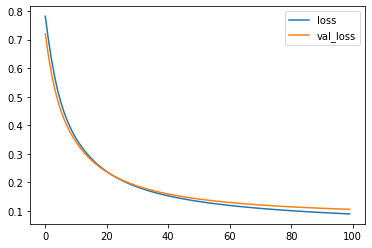

In [16]:
# plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

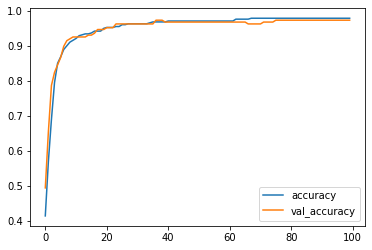

In [17]:
# plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Predictions

In [18]:
p = model.predict(X_test)

In [22]:
import numpy as np

In [23]:
y_pred = np.round(p).flatten()

In [25]:
print(f'Prediction accuracy:  {np.mean(y_pred == y_test)}')
print(f'Evaluate model: {model.evaluate(X_test, y_test)}')

Prediction accuracy:  0.973404255319149
6/6 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9734
Evaluate model: [0.10539446771144867, 0.9734042286872864]
